In [18]:
import xarray as xr
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
import cartopy.crs as ccrs


In [2]:
lyr=2000
dir_out = '//Gentemann-bigpc/f/data/sat_data/ccmp/pdf/'
filename=dir_out + str(lyr)+'pdf.nc'
ds=xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:  (lat: 719, lon: 719, spd: 299, spd2: 719)
Coordinates:
  * spd      (spd) float64 0.001 0.101 0.201 0.301 0.401 ... 29.5 29.6 29.7 29.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 88.75 89.0 89.25 89.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.0 178.5 179.0
  * spd2     (spd2) float64 0.001 0.101 0.201 0.301 ... 71.5 71.6 71.7 71.8
Data variables:
    hist1    (spd) int64 ...
    hist2    (lat, lon, spd2) float64 ...

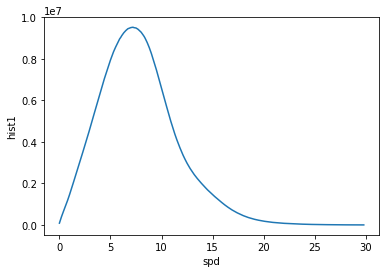

In [3]:
ds.hist1.plot()

In [5]:
cond = ds.spd<=3 #2
subset = ds.sel(spd=slice(0,3.01))
subset2 = ds.sel(spd=slice(0,35))
print(subset.hist1.sum()/subset2.hist1.sum())

<xarray.DataArray 'hist1' ()>
array(0.085165)


In [11]:
ds.spd[31]

<xarray.DataArray 'spd' ()>
array(3.101)
Coordinates:
    spd      float64 3.101

In [12]:
#print fraction of winds less than 2 m/s
print(ds.hist1[0:21].sum()/ds.hist1[0:299].sum())
print(ds.hist1[0:31].sum()/ds.hist1[0:299].sum())

<xarray.DataArray 'hist1' ()>
array(0.038205)
<xarray.DataArray 'hist1' ()>
array(0.085165)


In [6]:
ds.hist2

<xarray.DataArray 'hist2' (lat: 719, lon: 719, spd2: 719)>
[371694959 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 88.75 89.0 89.25 89.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.0 178.5 179.0
  * spd2     (spd2) float64 0.001 0.101 0.201 0.301 ... 71.5 71.6 71.7 71.8

In [7]:
ds

<xarray.Dataset>
Dimensions:  (lat: 719, lon: 719, spd: 299, spd2: 719)
Coordinates:
  * spd      (spd) float64 0.001 0.101 0.201 0.301 0.401 ... 29.5 29.6 29.7 29.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 88.75 89.0 89.25 89.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.0 178.5 179.0
  * spd2     (spd2) float64 0.001 0.101 0.201 0.301 ... 71.5 71.6 71.7 71.8
Data variables:
    hist1    (spd) int64 ...
    hist2    (lat, lon, spd2) float64 ...

In [13]:
f2=ds.hist2[:,:,0:21].sum(dim='spd2')
f2
f2=ds.hist2[:,:,0:31].sum(dim='spd2')
f2
#f=ds.hist2[:,:,0:21].sum(dim=2)/ds.hist2[:,:,:]
#f

<xarray.DataArray 'hist2' (lat: 719, lon: 719)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 88.75 89.0 89.25 89.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.0 178.5 179.0

In [14]:
fall=ds.hist2.sum(dim='spd2')

In [15]:
ff=f2/fall

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

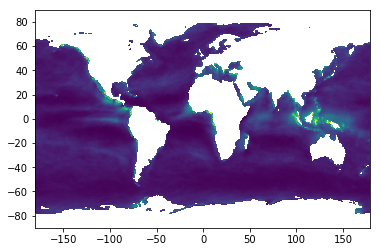

In [16]:
plt.pcolormesh(ds.lon,ds.lat,ff,vmin=0,vmax=1)
plt.colorbar

In [17]:
plt.pcolormesh(frac_map)

NameError: name 'frac_map' is not defined